In [31]:
%load_ext autoreload
%autoreload 2

## Geocoding


In [2]:
import os
key=os.environ.get("GOOGLEMAP_API_KEY")

In [3]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key=key)

# Geocoding an address
geocode_result = gmaps.geocode('chinese resteraunt manhatten')




lat = geocode_result[0]['geometry']['location']['lat']

lng = geocode_result[0]['geometry']['location']['lng']

In [4]:
lat

39.1903726

In [29]:
def geocoder_here(adress, token=HERE_API_KEY):
    """
    adress: NewYork libery
     ==>  {'lat': 41.79854, 'lng': -74.74493}
    """
    geocoderApi = herepy.GeocoderApi(api_key=token)
    res = geocoderApi.free_form(adress)
    res = res.as_dict()
    coords = res["items"][0]["position"]
    coords = {k.lower(): v for k, v in coords.items()}
    return coords

In [32]:
adress = "NewYork libery"
geocoder_here(adress)

{'lat': 41.79854, 'lng': -74.74493}

In [43]:
geocoderReverseApi.retrieve_addresses((41.79, -74.74)).as_dict()['items'][0]['address']['label']

'36 Liberty Commons Way, Liberty, NY 12754-3009, United States'

In [57]:
def reverse_geocoder_here(coords, token=HERE_API_KEY):
    """
    coords: (lat, lng)
    ==> 4 Av du General de Gaulle
    """
    geocoderReverseApi = herepy.GeocoderReverseApi(token)
    res = geocoderReverseApi.retrieve_addresses(coords)
    res = res.as_dict()
    adress = res['items'][0]['address']['label']
    lat = res['items'][0]['position']['lat']
    lng = res['items'][0]['position']['lng']
#     return {"adress":adress, "lat":lat, "lng":lng}
    return res

In [60]:
reverse_geocoder_here((40.7614327, -73.9798156))

{'items': [{'title': '1301 6th Ave, New York, NY 10019-0127, United States',
   'id': 'here:af:streetsection:ayDv8YQoFHkwSYfh0WeeiB:CgcIBCCWjukjEAEaBDEzMDE',
   'resultType': 'houseNumber',
   'houseNumberType': 'PA',
   'address': {'label': '1301 6th Ave, New York, NY 10019-0127, United States',
    'countryCode': 'USA',
    'countryName': 'United States',
    'stateCode': 'NY',
    'state': 'New York',
    'county': 'New York',
    'city': 'New York',
    'district': 'Theater District-Times Square',
    'street': '6th Ave',
    'postalCode': '10019-0127',
    'houseNumber': '1301'},
   'position': {'lat': 40.76175, 'lng': -73.98003},
   'access': [{'lat': 40.76141, 'lng': -73.9793}],
   'distance': 40,
   'mapView': {'west': -73.97994,
    'south': 40.76053,
    'east': -73.97903,
    'north': 40.76178}}]}

## check map

In [38]:
import pandas as pd
import numpy as np

In [39]:
def get_map_data():
    print('get_map_data called')
    return pd.DataFrame(
            np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4],
            columns=['lat', 'lon']
        )

In [40]:
get_map_data()

get_map_data called


,lat,lon
0,37.754900,-122.389403
1,37.777397,-122.431894
2,37.751341,-122.383356
3,37.737145,-122.387319
4,37.727492,-122.394000
...,...,...
995,37.781718,-122.391251
996,37.765211,-122.406913
997,37.781971,-122.418730
998,37.787618,-122.395946


In [41]:
np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4]

array([[  37.77356675, -122.40000464],
       [  37.75196372, -122.39941936],
       [  37.73721252, -122.4058184 ],
       ...,
       [  37.76652806, -122.38868628],
       [  37.76476245, -122.42208331],
       [  37.72967601, -122.40008939]])

In [45]:
pd.DataFrame({"lat":[1,2], "lng":[3,4]})

,lat,lng
0,1,3
1,2,4


## gcp.py

In [2]:
from Packages import gcp

In [5]:
gcp.get_movie_name_lst().tolist()

name_lst.joblib saved.
name_lst.joblib deleted.


['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'It Takes Two (1995)',
 'Clueless (1995)',
 'Cry, the Beloved Country

## `get_poster`

In [35]:
from Packages.utils import get_poster, get_movie_info

In [46]:
name="Misérables, Les"
name="Time of the Gypsies"
get_movie_info(name)

{'Runtime': '142 min',
 'Imdbrating': '8.2',
 'Genre': 'Comedy, Crime, Drama, Fantasy',
 'Director': 'Emir Kusturica',
 'Actors': 'Davor Dujmovic, Bora Todorovic, Ljubica Adzovic, Husnija Hasimovic',
 'Awards': '3 wins & 5 nominations.',
 'Plot': 'In this luminous tale set in the area around Sarajevo and in Italy, Perhan, an engaging young Romany (gypsy) with telekinetic powers, is seduced by the quick-cash world of petty crime, which threatens to destroy him and those he loves.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BODI2ZjVlMGQtMWE5ZS00MjJiLWIyMWYtMGU5NmIxNDc0OTMyXkEyXkFqcGdeQXVyMTQ3Njg3MQ@@._V1_SX300.jpg'}

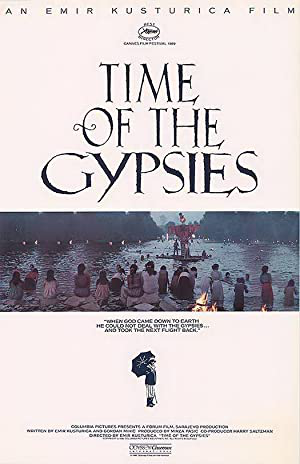

In [47]:
get_poster(name)

In [12]:
info_lst=[]
for k in ["Runtime", "imdbRating", "Genre", "Director",  "Actors", "Awards",  "Plot"]:
    info_lst.append(f"{k.capitalize()}: {info.get(k, 'No info')}")

In [13]:
info_lst

['Runtime: 81 min',
 'Imdbrating: 8.3',
 'Genre: Animation, Adventure, Comedy, Family, Fantasy',
 'Director: John Lasseter',
 'Actors: Tom Hanks, Tim Allen, Don Rickles, Jim Varney',
 'Awards: Nominated for 3 Oscars. Another 27 wins & 20 nominations.',
 "Plot: A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy's room."]

In [40]:
get_movie_info("Ladybird Ladybird")

{'Title': 'Ladybird Ladybird', 'Year': '1994', 'Rated': 'R', 'Released': '01 Jan 1995', 'Runtime': '101 min', 'Genre': 'Drama', 'Director': 'Ken Loach', 'Writer': 'Rona Munro', 'Actors': 'Crissy Rock, Vladimir Vega, Sandie Lavelle, Mauricio Venegas', 'Plot': "This Ken Loach docu-drama relates the story of a British woman's fight with Social Services over the care of her children. Maggie has a history of bouncing from one abusive relationship to ...", 'Language': 'English', 'Country': 'UK', 'Awards': '6 wins & 3 nominations.', 'Poster': 'https://m.media-amazon.com/images/M/MV5BYmQ0YjdkZTYtZWNiMi00ZTM1LTkzMjYtNTJkN2NiNGRhYjRhXkEyXkFqcGdeQXVyNDE0MzQxNjQ@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.4/10'}, {'Source': 'Rotten Tomatoes', 'Value': '75%'}], 'Metascore': 'N/A', 'imdbRating': '7.4', 'imdbVotes': '3,228', 'imdbID': 'tt0110296', 'Type': 'movie', 'DVD': 'N/A', 'BoxOffice': '$152,457', 'Production': 'N/A', 'Website': 'N/A', 'Response': 'True'}


{'Runtime': '101 min',
 'Imdbrating': '7.4',
 'Genre': 'Drama',
 'Director': 'Ken Loach',
 'Actors': 'Crissy Rock, Vladimir Vega, Sandie Lavelle, Mauricio Venegas',
 'Awards': '6 wins & 3 nominations.',
 'Plot': "This Ken Loach docu-drama relates the story of a British woman's fight with Social Services over the care of her children. Maggie has a history of bouncing from one abusive relationship to ...",
 'Poster': 'https://m.media-amazon.com/images/M/MV5BYmQ0YjdkZTYtZWNiMi00ZTM1LTkzMjYtNTJkN2NiNGRhYjRhXkEyXkFqcGdeQXVyNDE0MzQxNjQ@._V1_SX300.jpg'}

## wikipedia api as safetynet

In [1]:
import wikipedia

In [17]:
def wiki_search(name, cat):
    queries = wikipedia.search(name)
    for q in queries:
        if cat in q:
            return q
        else:
            try:
                return queries[0]
            except:
                return None
        
name="Time of the Gypsies"
query=wiki_search(name, "film")

In [18]:
wikipedia.summary(query)

'Time of the Gypsies (Serbian: Дом за вешање, Dom za vešanje, literally "Home for Hanging") is a 1988 Yugoslav coming-of-age fantasy crime drama film by director Emir Kusturica. Filmed in Romani and Serbo-Croatian, Time of the Gypsies tells the story of a young Romani man with magical powers who is tricked into engaging in petty crime. It is widely considered to be one of Kusturica\'s best films. The film was recorded in Sarajevo, Skopje and Milan, by the Forum Sarajevo. The film was selected as the Yugoslav entry for the Best Foreign Language Film at the 62nd Academy Awards, but was not accepted as a nominee.The film revolves around Perhan, a Romani teenager with telekinetic powers and his passage from childhood to adulthood which starts in a little village in Yugoslavia and ends in the criminal underworld of Milan. The film deals with magic realism.\nThe film\'s soundtrack was composed by Goran Bregović.'

In [20]:
img=wikipedia.WikipediaPage(query).images[0]

In [30]:
img={}
if not img.get("key", None):
    print("no error")

no error


In [22]:
from PIL import Image
import requests

im = Image.open(requests.get(img, stream=True).raw)

In [24]:
wikipedia.WikipediaPage(query).links

['1989 Cannes Film Festival',
 '26th Guldbagge Awards',
 '62nd Academy Awards',
 'A Separation',
 'A World Apart (film)',
 'Academy Award for Best Foreign Language Film',
 'AllMovie',
 'All About My Mother',
 'Amour (2012 film)',
 'Amélie',
 'Andrićgrad',
 'Arizona Dream',
 'Bagdad Cafe',
 'Before the Rain (1994 film)',
 'Best Director Award (Cannes Film Festival)',
 'Black Cat, White Cat',
 'Blue Is the Warmest Colour',
 'Bora Todorović',
 'Breaking the Waves',
 'Columbia Pictures',
 'Coming-of-age story',
 'Crime film',
 'César Awards',
 'Davor Dujmović',
 'Do You Remember Dolly Bell?',
 'Drama film',
 'Drvengrad',
 'El Pepe: A Supreme Life',
 'Emir Kusturica',
 'Fantasy film',
 'Festen',
 'Films about immigration to Italy',
 'For Sama',
 'Forum Sarajevo',
 'France',
 'Goran Bregović',
 'Gordan Mihić',
 'Guldbagge Award for Best Foreign Film',
 'Husbands and Wives',
 'IMDb',
 'Italian language',
 "L'Enfant (film)",
 'Leviathan (2014 film)',
 'Life Is a Miracle',
 'List of Yugoslav su